# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007 
## Lab 1: PyTorch Tutorial


## Goal of this lab: 
   - Understand Pytorch Tensor and its operation
   - Understand AutoGrad

## Install PyTorch

In [1]:
!pip install torch

## PyTorch Tensor
   1. Multi-dimensional Arrays
   2. Data Types
        - torch.FloatTensor
        - torch.IntTensor
   3. Compatible with Numpy Array


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Check Pytorch Version

In [3]:
torch.__version__

'2.1.2'

### Tensor Initialization

In [4]:
x = torch.zeros(6, 2)  # construct a 6x2 matrix

In [5]:
x, x.size()

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Size([6, 2]))

In [6]:
y = torch.rand(6, 2)  # construct a randomly initialized matrix

In [7]:
y, y.size()

(tensor([[0.4079, 0.2142],
         [0.1474, 0.0600],
         [0.9549, 0.0047],
         [0.2332, 0.8708],
         [0.7980, 0.5520],
         [0.6494, 0.2565]]),
 torch.Size([6, 2]))

In [8]:
z = torch.ones(7) # construct a matrix of ones

In [9]:
z, z.size()

(tensor([1., 1., 1., 1., 1., 1., 1.]), torch.Size([7]))

### Create a 3D tensor

In [10]:
ts = torch.rand(3, 4, 2)

In [11]:
ts

tensor([[[0.4311, 0.9435],
         [0.0336, 0.2276],
         [0.7579, 0.0939],
         [0.9765, 0.5672]],

        [[0.8426, 0.6913],
         [0.6775, 0.7176],
         [0.0446, 0.4023],
         [0.4303, 0.4518]],

        [[0.8008, 0.0712],
         [0.6443, 0.2217],
         [0.9423, 0.5977],
         [0.3025, 0.6888]]])

### Create a tensor of specific type

In [12]:
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)

In [13]:
float_tensor, float_tensor.dtype

(tensor([1., 2., 3.]), torch.float32)

In [14]:
# Create an integer tensor
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int64)

In [15]:
int_tensor, int_tensor.dtype

(tensor([1, 2, 3]), torch.int64)

In [16]:
# Create a boolean tensor
bool_tensor = torch.tensor([True, False, True], dtype=torch.bool)

In [17]:
bool_tensor, bool_tensor.dtype

(tensor([ True, False,  True]), torch.bool)

### Convert between types

In [18]:
# Convert to float32
float_tensor = int_tensor.float()
float_tensor

tensor([1., 2., 3.])

In [19]:
# Convert to int64
int_tensor = float_tensor.to(torch.int64)
int_tensor

tensor([1, 2, 3])

In [20]:
# Convert to boolean
bool_tensor = int_tensor.bool()
bool_tensor

tensor([True, True, True])

### Conversion between Tensor array and Numpy array
    - They share the same memory location! So one change will affect another

In [21]:
# Create a PyTorch tensor
tensor = torch.tensor([1, 2, 3, 4, 5])

# Convert the tensor to a NumPy array
array = tensor.numpy()

# Show the initial values of the tensor and array
print("Original tensor:", tensor)
print("Original array:", array)
print()
# Modify the tensor
tensor[0] = 10

# Show the modified tensor and array
print("Modified tensor:", tensor)
print("Modified array:", array)

Original tensor: tensor([1, 2, 3, 4, 5])
Original array: [1 2 3 4 5]

Modified tensor: tensor([10,  2,  3,  4,  5])
Modified array: [10  2  3  4  5]


In [22]:
# Create a NumPy array
array = np.array([1, 2, 3, 4, 5])

# Convert the NumPy array to a PyTorch tensor
tensor = torch.from_numpy(array)

# Show the initial values of the array and tensor
print("Original array:", array)
print("Original tensor:", tensor)

# Modify the array
array[0] = 10

# Show the modified array and tensor
print("Modified array:", array)
print("Modified tensor:", tensor)

Original array: [1 2 3 4 5]
Original tensor: tensor([1, 2, 3, 4, 5])
Modified array: [10  2  3  4  5]
Modified tensor: tensor([10,  2,  3,  4,  5])


## Operation Example: Addtion
Related reading and reference:
    
* PyTorch documentation:
<a href="https://pytorch.org/docs/stable/nn.html"> https://pytorch.org/docs/stable/nn.html </a>

In [23]:
# Create two 2D tensors (matrices)
matrix1 = torch.tensor([[1, 2],
                        [3, 4]])
matrix2 = torch.tensor([[5, 6], 
                        [7, 8]])

# Matrix Addition
add_result = matrix1 + matrix2
print("Matrix Addition:\n", add_result)

Matrix Addition:
 tensor([[ 6,  8],
        [10, 12]])


In [24]:
# Matrix Subtraction
subtract_result = matrix1 - matrix2
print("Matrix Subtraction:\n", subtract_result)

Matrix Subtraction:
 tensor([[-4, -4],
        [-4, -4]])


In [25]:
# Element-wise Multiplication
elementwise_multiply_result = matrix1 * matrix2
print("Element-wise Multiplication:\n", elementwise_multiply_result)

Element-wise Multiplication:
 tensor([[ 5, 12],
        [21, 32]])


In [26]:
# Matrix Multiplication (Dot Product)
# Using matmul for dot product of matrices
dot_product_result = matrix1 @ matrix2
print("Matrix Multiplication (Dot Product):\n", dot_product_result)


Matrix Multiplication (Dot Product):
 tensor([[19, 22],
        [43, 50]])


## Autograd: automatic differentiation
* Autograd is an automatic differentiation system in PyTorch. It's a key component for training neural networks. Autograd records operations on tensors as they are performed. When the computation is complete, you can call **.backward()** on the final output tensor to efficiently compute gradients (partial derivatives) of all involved tensors that have **requires_grad=True**.

## Example:

#### Regarding the function $L$:
$L = (y_{\text{pred}} - y_{\text{true}})^2 \\ 
y = Wx + b$

#### The gradients for variables $W$ and $b$ are:
$\frac{\partial L}{\partial W} = 2x(y_{\text{pred}} - y_{\text{true}}) \\$
$\frac{\partial L}{\partial b} = 2(y_{\text{pred}} - y_{\text{true}})$

In [27]:
# Input (x), Parameters (W, b), and Target (y_true)
x = torch.tensor([1.0], requires_grad=False)  # Input
W = torch.tensor([2.0], requires_grad=True)  # Weight
b = torch.tensor([1.0], requires_grad=True)  # Bias
y_true = torch.tensor([5.0])  # Target

In [28]:
# Linear Model: y_pred = W*x + b
y_pred = W * x + b

# Loss Function: Mean Squared Error
loss = (y_pred - y_true) ** 2

In [29]:
# Compute Gradients
loss.backward()

In [30]:
# Gradients of W and b
W_grad = W.grad
b_grad = b.grad

print("Gradient of W:", W_grad.item())
print("Gradient of b:", b_grad.item())

Gradient of W: -4.0
Gradient of b: -4.0


## Use the computed gradient to minimize the loss funciton

In [31]:
# Define the loss function
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

In [35]:
# Define the input, target, and initial weight
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
y = torch.tensor([5.0, 4.0, 1.0], requires_grad=False)
W = torch.rand((3,),requires_grad=True)

# Initialization
learning_rate = 0.01
num_epochs = 100
loss_values = []  # List to store loss values

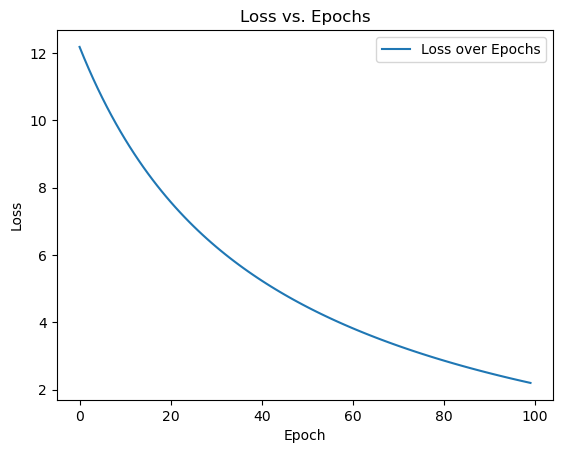

tensor([2.4611, 1.8868, 0.3338], requires_grad=True)

In [36]:
# Optimization Loop
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y
    y_pred = W * x

    # Compute loss
    loss = mse_loss(y_pred, y)
    loss_values.append(loss.item())

    # Zero gradients before backward pass
    W.grad = None

    # Backward pass to compute gradient of loss with respect to W
    loss.backward()

    # Update weights
    with torch.no_grad():
        W -= learning_rate * W.grad

# Plotting the loss over epochs
plt.plot(loss_values, label='Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()
W